In [ ]:
import zipfile
from google.colab import drive
import os
import pandas as pd
import numpy as np
 
 
drive.mount('/content/drive')
 
zip_file = '/content/drive/MyDrive/KedyKrossyDataset.zip'
z = zipfile.ZipFile(zip_file,'r')
z.extractall()

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import json
import cv2
import matplotlib.pyplot as plt
import random

In [ ]:
SIZE = 224

In [ ]:
def show_image(img):
    plt.imshow(img)
    plt.show()

def random_flip_horizontal(image):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
    return image


def random_transpose(image):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.transpose(image)
        
    return image

def random_rotate(image):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.rot90(image)
    return image


def random_hue(image):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.random_hue(image, 0.1)
    return image

def random_contrast(image):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.random_contrast(
            image, lower=0.5, upper=0.9)
    return image

def random_brightness(image):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.random_brightness(
            image, max_delta=0.2)
    return image

def random_scaled(image):
    if tf.random.uniform(()) > 0.5:
        image = image/255
    return image

def load_image(fname, start = 0, stop = 10):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img

In [ ]:

class TrainDataset(tf.keras.utils.Sequence):
    def __init__(self, dirname, k_size = 0.8, flag_train = True):
        self.dirname = dirname
        self.flag_train = flag_train
        fname_list1 = sorted([dirname + '/kedy/' + s for s in os.listdir(dirname + '/kedy')])
        fname_list2 = sorted([dirname + '/krossy/' + s for s in os.listdir(dirname + '/krossy')])
        if self.flag_train:
            self.fname_list = fname_list1[:int(len(list(fname_list1))*k_size)] + fname_list2[:int(len(list(fname_list2))*k_size)]
        else:
            self.fname_list = fname_list1[int(len(list(fname_list1))*(1 - k_size)):] + fname_list2[int(1 - len(list(fname_list2))*(1 - k_size)):]
        random.shuffle(self.fname_list)
                                                                                      

    def __len__(self):
        return len(self.fname_list)

    def __getitem__(self, idx):
        img = load_image(self.fname_list[idx])
        if img.shape[1] != SIZE:
            img = cv2.resize(img, (SIZE, SIZE))
        
        if self.flag_train:
            img = random_flip_horizontal(img)
            img = random_transpose(img)
            img = random_rotate(img)
            img = random_brightness(img)

        if 'kedy' in self.fname_list[idx]:
            y = 0
        else:
            y = 1
        
        return np.array(img).reshape((1, SIZE, SIZE, 3)), np.array(y).reshape((-1,1))

In [ ]:
def build_model():
    base_model = tf.keras.applications.EfficientNetB0(include_top=False,input_shape=(SIZE, SIZE, 3))
    base_model.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
model = build_model()

16719872/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dropout (Dropout)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 62721     
Total params: 4,112,292
Trainable params: 62,721
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
train_dataset = TrainDataset('/content/KedyKrossy', flag_train = True)
test_dataset = TrainDataset('/content/KedyKrossy', flag_train = False)

In [ ]:
print('Количество кроссовок:', len(os.listdir('/content/KedyKrossy/krossy')))
print('Количество кед:', len(os.listdir('/content/KedyKrossy/kedy')))

Количество кроссовок: 4127
Количество кед: 4777




 кеды


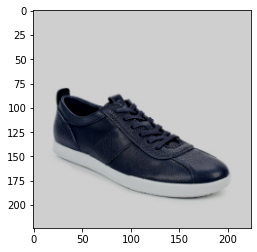



 кеды


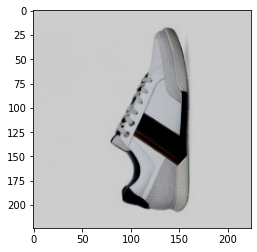



 кеды


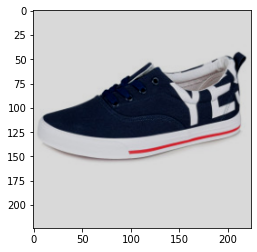



 кеды


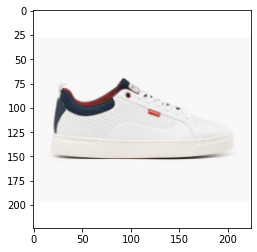



 кеды


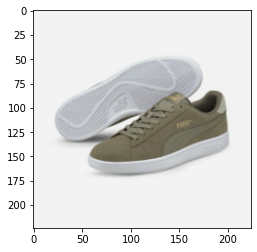



 кроссовки


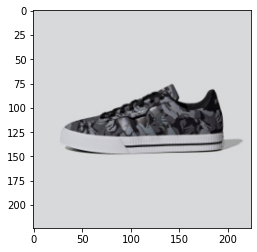



 кеды


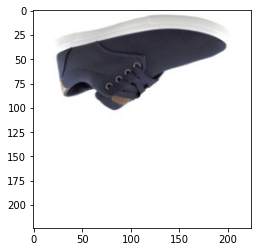



 кроссовки


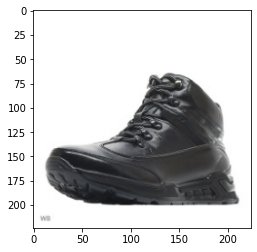



 кроссовки


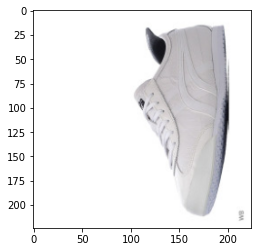



 кеды


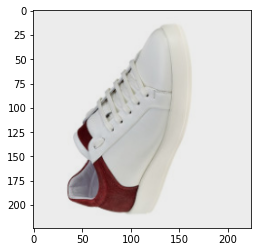

In [ ]:
# Некоторые примеры после аугментации на тренировочной выборке
answer = ['кеды', 'кроссовки']
count = 0
for x, y in train_dataset:
    if count == 10: break
    print('\n\n',answer[round(y[0, 0])])
    show_image(x[0])
    count += 1

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.fit(train_dataset, validation_data = test_dataset, epochs = 20, callbacks= callback)

Epoch 1/20
7122/7122 [==============================] - 300s 37ms/step - loss: 4.9870 - accuracy: 0.7568 - val_loss: 1.9127 - val_accuracy: 0.8935
Epoch 2/20
7122/7122 [==============================] - 260s 37ms/step - loss: 4.8692 - accuracy: 0.8137 - val_loss: 2.3335 - val_accuracy: 0.8838
Epoch 3/20
7122/7122 [==============================] - 260s 37ms/step - loss: 5.2936 - accuracy: 0.8291 - val_loss: 2.5197 - val_accuracy: 0.8915
Epoch 4/20
7122/7122 [==============================] - 258s 36ms/step - loss: 5.1533 - accuracy: 0.8406 - val_loss: 5.0680 - val_accuracy: 0.7880
Epoch 5/20
7122/7122 [==============================] - 259s 36ms/step - loss: 4.9515 - accuracy: 0.8412 - val_loss: 2.3864 - val_accuracy: 0.9008
Epoch 6/20
7122/7122 [==============================] - 258s 36ms/step - loss: 4.8364 - accuracy: 0.8512 - val_loss: 2.9116 - val_accuracy: 0.8782
Epoch 7/20
7122/7122 [==============================] - 259s 36ms/step - loss: 4.8297 - accuracy: 0.8576 - val_loss: 9



predicted answer:  кеды
truth answer:  кеды


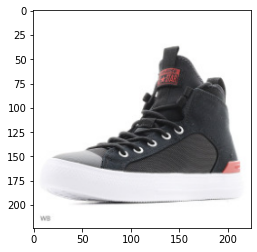



predicted answer:  кеды
truth answer:  кеды


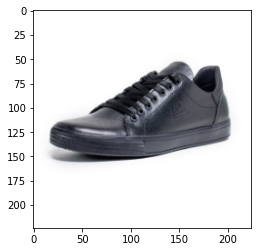



predicted answer:  кеды
truth answer:  кеды


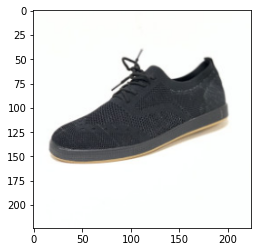



predicted answer:  кроссовки
truth answer:  кроссовки


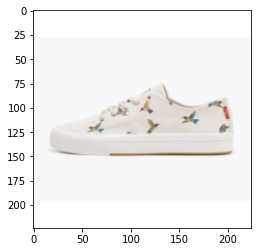



predicted answer:  кеды
truth answer:  кеды


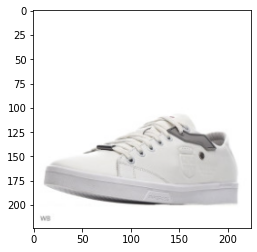



predicted answer:  кеды
truth answer:  кеды


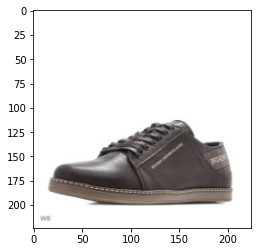



predicted answer:  кеды
truth answer:  кеды


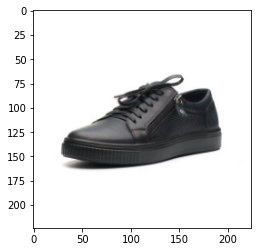



predicted answer:  кеды
truth answer:  кеды


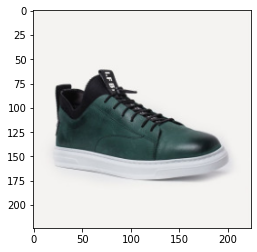



predicted answer:  кеды
truth answer:  кеды


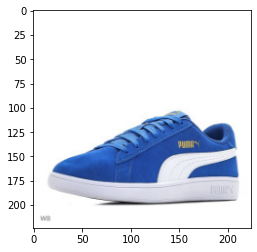



predicted answer:  кроссовки
truth answer:  кроссовки


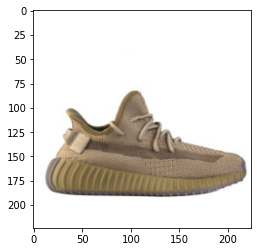



predicted answer:  кеды
truth answer:  кеды


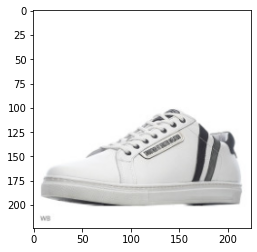



predicted answer:  кеды
truth answer:  кеды


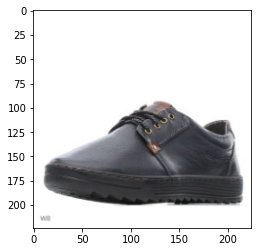



predicted answer:  кеды
truth answer:  кеды


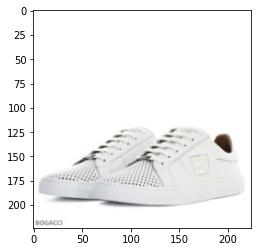



predicted answer:  кроссовки
truth answer:  кроссовки


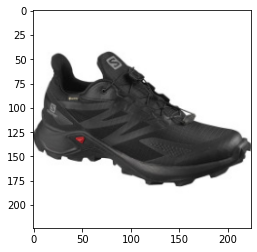



predicted answer:  кеды
truth answer:  кеды


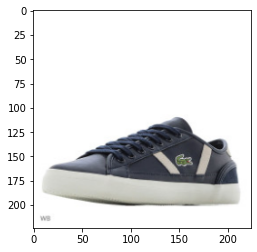



predicted answer:  кеды
truth answer:  кеды


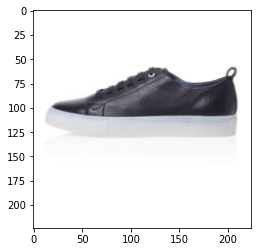



predicted answer:  кроссовки
truth answer:  кроссовки


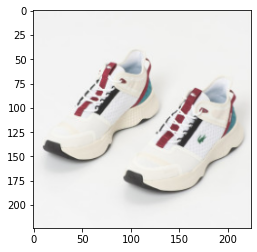



predicted answer:  кеды
truth answer:  кеды


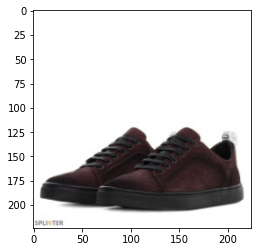



predicted answer:  кеды
truth answer:  кеды


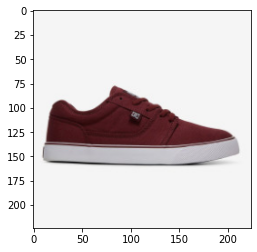



predicted answer:  кеды
truth answer:  кеды


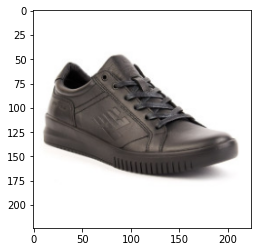



predicted answer:  кеды
truth answer:  кеды


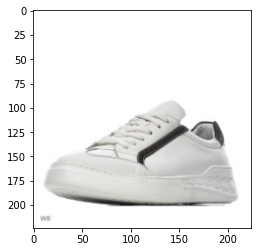



predicted answer:  кроссовки
truth answer:  кроссовки


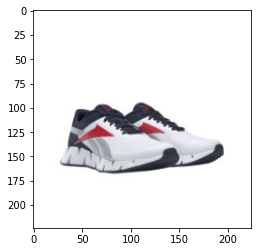



predicted answer:  кеды
truth answer:  кеды


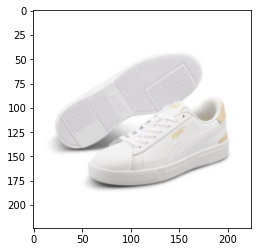



predicted answer:  кеды
truth answer:  кеды


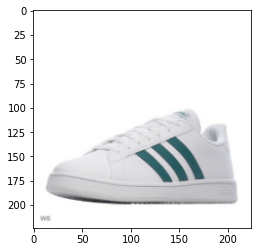



predicted answer:  кроссовки
truth answer:  кроссовки


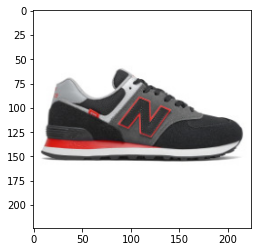



predicted answer:  кеды
truth answer:  кеды


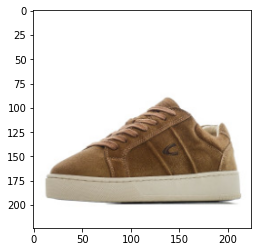



predicted answer:  кеды
truth answer:  кеды


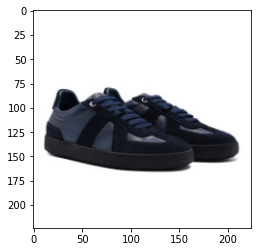



predicted answer:  кеды
truth answer:  кеды


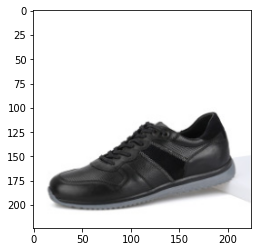



predicted answer:  кеды
truth answer:  кеды


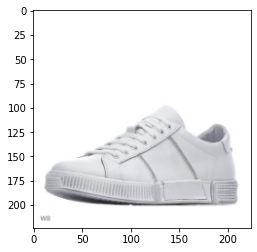



predicted answer:  кеды
truth answer:  кеды


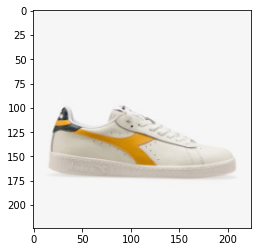



predicted answer:  кеды
truth answer:  кеды


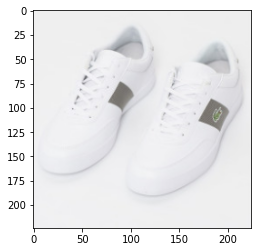



predicted answer:  кроссовки
truth answer:  кроссовки


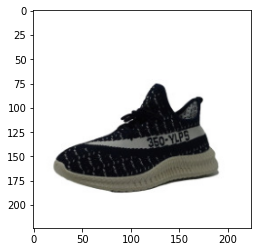



predicted answer:  кеды
truth answer:  кеды


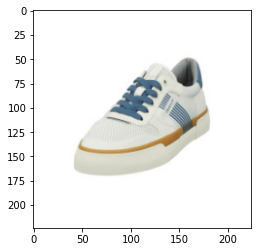



predicted answer:  кеды
truth answer:  кеды


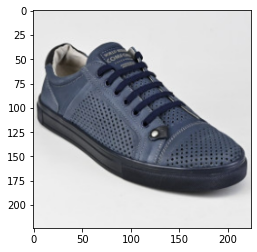



predicted answer:  кеды
truth answer:  кеды


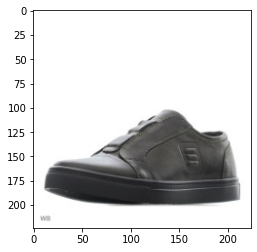



predicted answer:  кроссовки
truth answer:  кроссовки


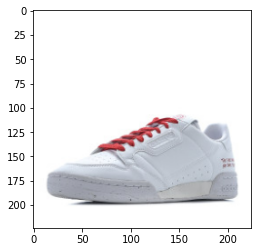



predicted answer:  кеды
truth answer:  кеды


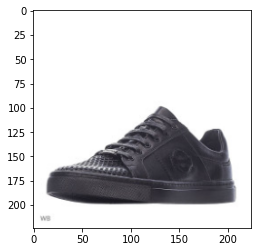



predicted answer:  кеды
truth answer:  кеды


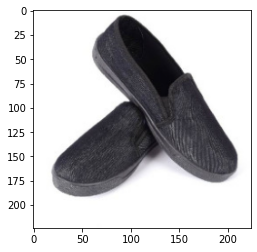



predicted answer:  кроссовки
truth answer:  кроссовки


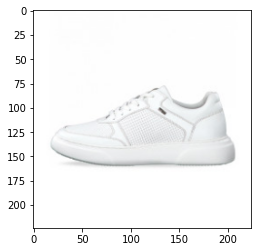



predicted answer:  кеды
truth answer:  кеды


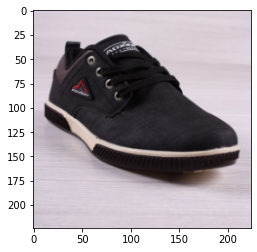



predicted answer:  кеды
truth answer:  кеды


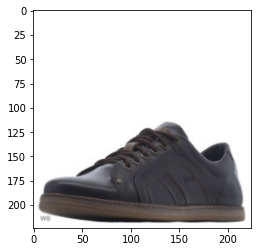



predicted answer:  кеды
truth answer:  кеды


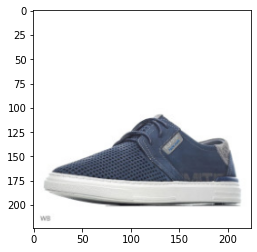



predicted answer:  кеды
truth answer:  кеды


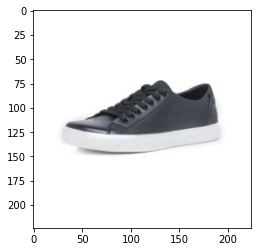



predicted answer:  кеды
truth answer:  кеды


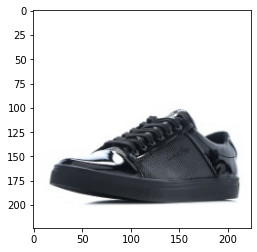



predicted answer:  кеды
truth answer:  кеды


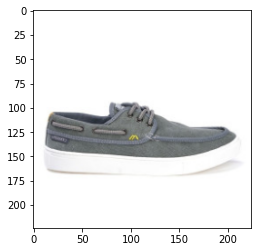



predicted answer:  кеды
truth answer:  кеды


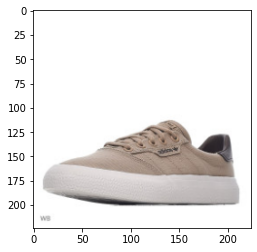



predicted answer:  кеды
truth answer:  кеды


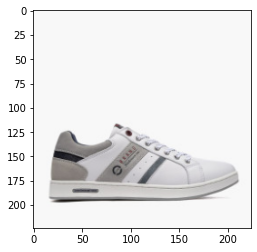



predicted answer:  кроссовки
truth answer:  кроссовки


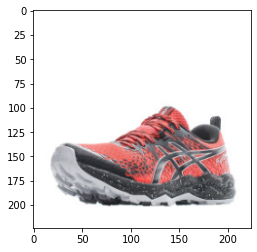



predicted answer:  кеды
truth answer:  кеды


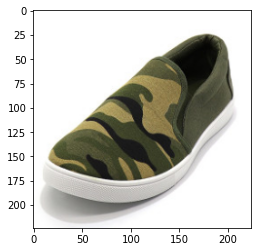



predicted answer:  кеды
truth answer:  кеды


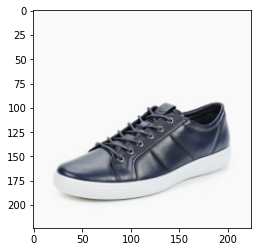

In [ ]:
answer = ['кеды', 'кроссовки']
count = 0
for x, y in test_dataset:
    if count == 50: break
    y_pred = model.predict(x)
    print('\n\npredicted answer: ',answer[round(y_pred[0, 0])])
    print('truth answer: ',answer[round(y_pred[0, 0])])
    show_image(x[0])
    count += 1